In [10]:
%matplotlib inline
from SALib.analyze import sobol as sobol
from SALib.analyze import morris as morris_analyzer

from SALib.sample import saltelli as saltelli_sampler
from SALib.sample import morris as morris_sampler

from scipy.optimize import minimize

import numpy as np
import pandas as pd
from pandas import date_range,Series,DataFrame,read_csv, qcut

import matplotlib.pyplot as plt
import sklearn
np.set_printoptions(suppress=True)
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process.kernels import *
from sklearn.model_selection import GridSearchCV



## Exercise 1: surrogate modelling

The actual dependency is not given, only a data set of inputs and outputs.
To perform sensitivity analysis and optimization we are going to use a regression model.

Your tasks:

* Load data set.
* Build several regression models using different techniques: Gaussian Process Regression, Kernel Ridge regression, SVM.
* Perform k-fold cross-validation for each model and choose the best.
* The most accurate model will be used in all subsequent excersices.

## Для начала загрузим данные и определим модели которые будем рассматривать

In [12]:
#Load data set
data=pd.read_csv('C://Users/Rpl/Downloads/doe_100.csv', sep=',')

regressors = ["r1","t1","r2","r3","t3","r4"]
output_variables = ["mass","smax","u2"]
X=data[regressors].as_matrix()
#рассматриваемые модели
models = []
svr = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

kernel_ridge = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     "alpha": [1e0, 0.1, 1e-2, 1e-3]},
                                 {'kernel': ['chi2'], 'gamma': [1e-3, 1e-4],
                     "alpha": [1e0, 0.1, 1e-2, 1e-3]},
                                 {'kernel': ['cosine'], 
                     "alpha": [1e0, 0.1, 1e-2, 1e-3]},
                    {'kernel': ['linear'], "alpha": [1e0, 0.1, 1e-2, 1e-3]}]


gauss = [
                         {'alpha': [1e0, 1e-1, 1e-2, 1e-3], 
                     'kernel': [ 1.0 * RationalQuadratic(length_scale=b, alpha=a) for a in np.linspace(0.1, 10, num=30) for b in np.linspace(0.1, 5, num=10)]},
                          {'alpha': [1e0, 1e-1, 1e-2, 1e-3], 
                     'kernel': [ ConstantKernel(b, (0.01, 10.0))  * RBF(a) for a in np.linspace(0.1, 10, num=30) for b in np.linspace(0.1, 5, num=10)]},
                         {'alpha': [1e0, 1e-1, 1e-2, 1e-3], 
                     'kernel': [ ConstantKernel(b, (0.01, 10.0)) * (DotProduct(sigma_0=a, sigma_0_bounds=(0.1, 10.0)) ** 2) for a in np.linspace(0.1, 10, num=30) for b in np.linspace(0.1, 5, num=10)]
                         }]


## Теперь для каждой зависимой переменной (mass,smax,u2) найдем жадным поиском наилучшие параметры модели.После этого выберем модель с наибольшим средним коэф. детермизации полученным после кросс валидации. 

In [14]:
y= data["mass"].as_matrix()

reg = GridSearchCV(SVR(), svr, n_jobs=-1)
reg.fit(X, y)
print("SVR MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

reg = GridSearchCV(KernelRidge(), kernel_ridge, n_jobs=-1)
reg.fit(X, y)
print("KERNEL_RIDGE MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

reg = GridSearchCV(GaussianProcessRegressor(), gauss, n_jobs=-1)
reg.fit(X, y)
print("GAUSS MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

SVR MODEL
Accuracy of model:  0.99711426105
Parameters of model
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
KERNEL_RIDGE MODEL
Accuracy of model:  0.99793677911
Parameters of model
{'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
GAUSS MODEL
Accuracy of model:  0.999957258894
Parameters of model
{'alpha': 0.001, 'kernel': 1**2 * RationalQuadratic(alpha=4.2, length_scale=3.91)}


C:\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00861745, -0.00014657,  0.03856004]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'warnflag': 2, 'nit': 20}
  " state: %s" % convergence_dict)


In [15]:
y= data["smax"].as_matrix()

reg = GridSearchCV(SVR(), svr, n_jobs=-1)
reg.fit(X, y)
print("SVR MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

reg = GridSearchCV(KernelRidge(), kernel_ridge, n_jobs=-1)
reg.fit(X, y)
print("KERNEL_RIDGE MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

reg = GridSearchCV(GaussianProcessRegressor(), gauss, n_jobs=-1)
reg.fit(X, y)
print("GAUSS MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

SVR MODEL
Accuracy of model:  0.799853637879
Parameters of model
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
KERNEL_RIDGE MODEL
Accuracy of model:  0.821965413325
Parameters of model
{'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
GAUSS MODEL
Accuracy of model:  0.842147989342
Parameters of model
{'alpha': 0.001, 'kernel': 1**2 * RationalQuadratic(alpha=8.63, length_scale=2.82)}


In [16]:
y= data["u2"].as_matrix()

reg = GridSearchCV(SVR(), svr, n_jobs=-1)
reg.fit(X, y)
print("SVR MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

reg = GridSearchCV(KernelRidge(), kernel_ridge, n_jobs=-1)
reg.fit(X, y)
print("KERNEL_RIDGE MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

reg = GridSearchCV(GaussianProcessRegressor(), gauss, n_jobs=-1)
reg.fit(X, y)
print("GAUSS MODEL")
print("Accuracy of model: ",reg.best_score_)
print("Parameters of model")
print(reg.best_params_)

SVR MODEL
Accuracy of model:  0.260699837829
Parameters of model
{'C': 1, 'kernel': 'linear'}
KERNEL_RIDGE MODEL
Accuracy of model:  0.931547404297
Parameters of model
{'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
GAUSS MODEL
Accuracy of model:  0.968403626257
Parameters of model
{'alpha': 0.01, 'kernel': 0.316**2 * DotProduct(sigma_0=0.1) ** 2}


In [17]:
models = []
models.append(GaussianProcessRegressor(kernel = 1.0*RationalQuadratic(alpha=4.2, length_scale=3.91), alpha = 0.001))
models.append(GaussianProcessRegressor(kernel = 1.0*RationalQuadratic(alpha=8.63, length_scale=2.82), alpha = 0.001))
models.append(GaussianProcessRegressor(kernel = 0.316**2 * DotProduct(sigma_0=0.1) ** 2, alpha = 0.01))

for var, model in zip(output_variables, models):
    model.fit(X, data[var].as_matrix())

## Exercise 2: sensitivity analysis

SALib is a python library for sensitivity analysis.

It implements some popular global sensitivity analysis methods: 
* Morris method - that may be thought of as crude estimation of average absolute value of partial derivative, 
* Sobol indicies - that show portion of variance in the output that is explained by input,

Each method takes **x** and **y** samples as input. But the samples must be properly generated.
There are special functions in SALib library to do it.

Your tasks:

* Calculate Sobol indices:
    * Generate **x** and **y** samples using Saltelli’s extension of the Sobol sequence
    * Calculate Sobol indices using obtained samples
* Calculate screening indices
    * Generate **x** and **y** samples for Morris method
    * Apply Morris method to generated samples to obtain screening indices
* Based on the result try to make your conclusion: what variables influence the output?

### Теперь мы постараемся понять какие переменные оказывают значимое влияния на различные зависимые переменные,а какие нет. Для этого воспользуемся индексами Соболя и скринингом Морриса. Ниже представленны визуализированные результаты.

Sobol test for mass
Regressors importance 	 [ 0.09639896  0.4306505   0.00187223  0.00177059  0.49003731  0.00484022]

Sobol test for smax
Regressors importance 	 [ 0.07509459  0.95383031  0.00822059  0.00491049  0.0764663   0.02087797]

Sobol test for u2
Regressors importance 	 [ 0.34293625  0.47023996  0.00356104  0.01210089  0.17581098  0.01873578]



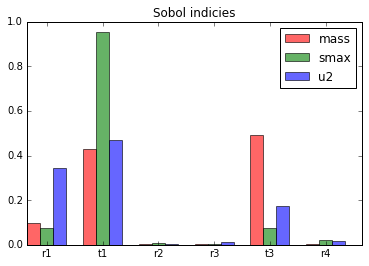

In [20]:
#Sobol
problem = {
    'num_vars': 6,
    'names': data.columns.values[:6],
    'bounds': np.array([[10.0, 110.0],
                        [4.0, 50.0],
                        [120.0, 140.0],
                        [150.0, 168.0],
                        [4.0, 50.0],
                        [170.0, 200.0]]),
    'groups': None
    }

index = np.arange(6)
bw = (1-0.3)/3
opacity = 0.6
colors =['r', 'g', 'b']
inputs = saltelli_sampler.sample(problem, 1000)
for i, var, model in zip(range(3), output_variables, models):
    output = model.predict(inputs)
    Si = sobol.analyze(problem, output)
    print("Sobol test for "+var)
    print("Regressors importance \t", Si["ST"])
    print()
    plt.bar(index + bw*i, Si["ST"], bw, label=var, color=colors[i], alpha = opacity)   
plt.xticks(index + (1-0.3)/2, ["r1","t1","r2","r3","t3","r4"])
plt.legend()
plt.title("Sobol indicies")
plt.show()

Morris test for mass
Regressors importance 	 [ 0.15385203  0.35296957  0.02564477  0.02487814  0.40071071  0.04194477]

Morris test for smax
Regressors importance 	 [ 0.15123698  0.54094346  0.04105012  0.03671586  0.15259425  0.07745932]

Morris test for u2
Regressors importance 	 [ 0.3005373   0.34369376  0.02994899  0.05542317  0.2036807   0.06671608]



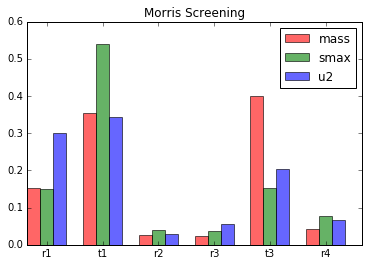

In [21]:
#Morris
inputs = morris_sampler.sample(problem, 1000,num_levels=4, grid_jump=2)

for i, var, model in zip(range(3), output_variables, models):
    output = model.predict(inputs)
    Si = morris_analyzer.analyze(problem, inputs, output, num_levels=4, grid_jump=2)
    print("Morris test for "+var)
    w= Si["mu_star"]/sum(Si["mu_star"])
    print("Regressors importance \t", w)
    print()
    plt.bar(index + bw*i, w, bw, label=var, color=colors[i], alpha = opacity)
    
plt.xticks(index + (1-0.3)/2, ["r1","t1","r2","r3","t3","r4"])
plt.legend()
plt.title("Morris Screening")
plt.show()


## Значимыми переменными оказались: r1, t1, t3.

## Exercise 3: Optimization

The final goal is to optimize the mass of the rotating disk. It will be done with GTOpt optimizer via approximation the surrogate model constructed. We assume that surrogate model is of reasonable quality. The optimization problem for full parameter space is prepared for you.

The following optimization problem should be solved:

$$
{\rm mass} \rightarrow \min_x \\
\mbox{subject to} \quad S_{max}(x) \le 600 \\
\qquad \qquad U_2(x) \le 0.3
$$

Your tasks:

* Perform optimization by running code below
* Change optimization problem statement in order to include only important variables into optimization problem statement
* Compare the results of optimization for two formulations considered

### В данном задании нам предстоит минимизировать массу диска. Из прошлых заданий мы узнали что на массу диска по большей части влияют 3 регрессора:r1,t1,t3. Посмотрим на данную модель минимазации массы сначала со всеми переменными а потом только со значимыми.

In [22]:
#Perform optimization by running code below
regressors =["r1","t1","r2","r3","t3","r4"]
X=data[regressors].as_matrix()
for var, model in zip(output_variables, models):
    model.fit(X, data[var].as_matrix())
    
result =minimize(lambda x: models[0].predict(x.reshape(1, -1)), [109.0, 32.0, 123.0, 154.0, 6.0, 198.0],
                 bounds=problem['bounds'],
                 constraints=[{'type': 'eq',
                               'fun' : lambda x: 600 - models[1].predict(x.reshape(1, -1))},
                             {'type': 'eq',
                               'fun' : lambda x: 0.3 - models[2].predict(x.reshape(1, -1))},
                             ],
                options={'maxiter':1000})
print(result)

     fun: array([ 20.85490044])
     jac: array([ -36.10229492,   89.27148438,  -23.296875  ,   83.09667969,
        -42.43017578, -110.16357422,    0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 7553
     nit: 482
    njev: 478
  status: 0
 success: True
       x: array([  63.69540421,   15.47277287,  124.34149366,  150.00578785,
         40.08380953,  194.70427393])


In [23]:
#Change optimization problem statement in order to include only important variables into optimization problem statement
regressors =["r1","t1","t3"]
X=data[regressors].as_matrix()
for var, model in zip(output_variables, models):
    model.fit(X, data[var].as_matrix())
    
result =minimize(lambda x: models[0].predict(x.reshape(1, -1)), [109.0, 32.0, 6.0],
                 bounds=np.array([[10.0, 110.0],
                        [4.0, 50.0],
                        [4.0, 50.0]]),
                 constraints=[{'type': 'eq',
                               'fun' : lambda x: 600 - models[1].predict(x.reshape(1, -1))},
                             {'type': 'eq',
                               'fun' : lambda x: 0.3 - models[2].predict(x.reshape(1, -1))},
                             ])
print(result)

     fun: array([ 13.62229933])
     jac: array([-0.02017212,  0.20278168,  0.15844727,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 75
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 50.01736548,  19.97123834,   4.        ])


### Мы пришли к тому что убрав не значимые регрессоры (переменные которые слабо влияют на массу диска) нам удалось уменьшить массу диска при выполнении оптимизационной задачи.